Испортирование библеотек:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


Чтение файла:

In [ ]:
df = pd.read_csv("DataF.csv")

In [ ]:
print(df.shape)

(7000, 24)


Удаление строк, в который один из признаков принимает значение NaN или NULL:

In [ ]:
missing_values = df.isnull().sum()
if missing_values.any():
    print("В данных есть пропуски в следующих столбцах:")
    print(missing_values)

В данных есть пропуски в следующих столбцах:
Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(5353, 24)

Матрица корреляции

<ipython-input-12-42e343bbba92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


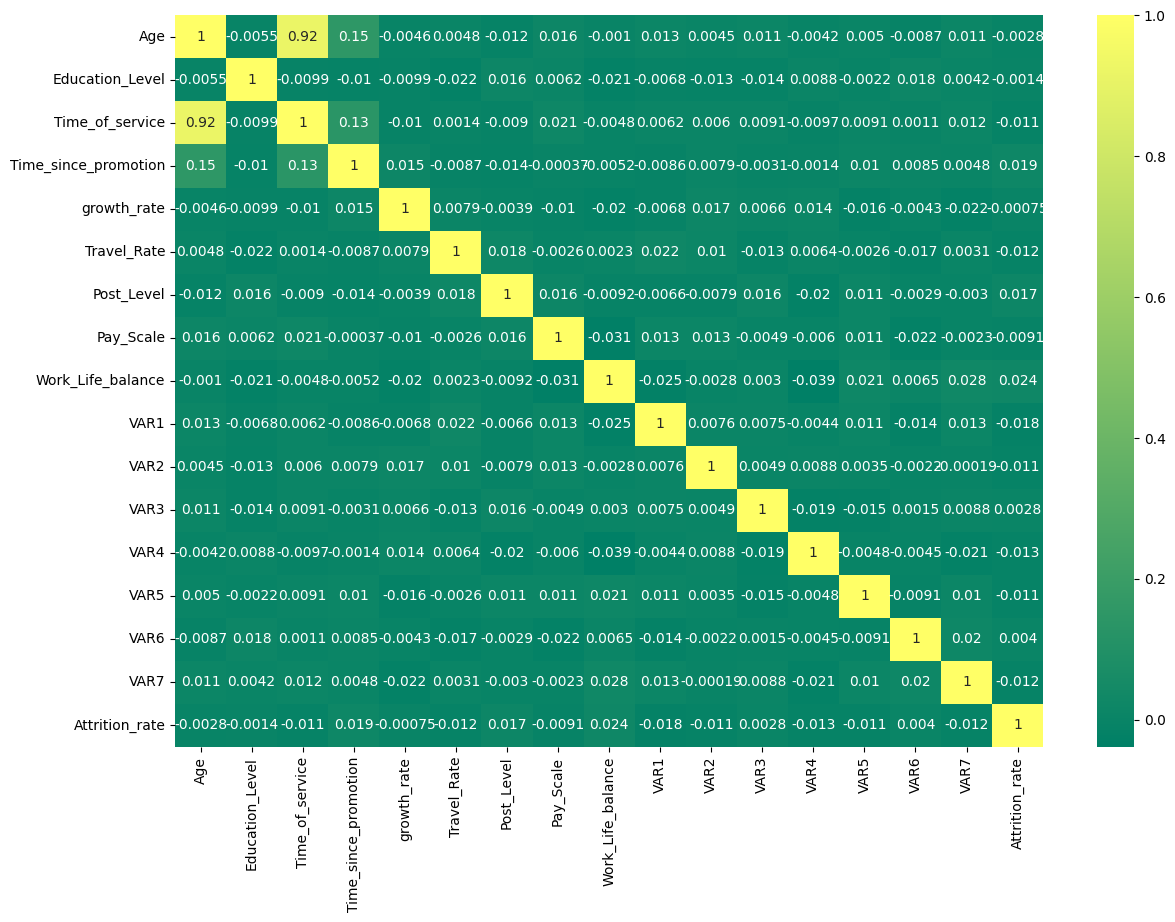

In [ ]:
corr = df.corr()
plt.figure(figsize=(14, 9.5))
sns.heatmap(corr, annot=True, cmap='summer')
plt.show()

Время обслуживания очень сильно зависит от возраста человека, которого обслуживают. В идеале можно было бы объединить эти два признака в один.


In [ ]:
xes = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate',
       'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2',
        'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']

y = 'Attrition_rate'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[xes], df[y], test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict = model.predict(X_test)

Проверка модели


In [ ]:
mae = mean_absolute_error(Y_test, Y_predict) # Среднее Абсолютное Отклонение. 0
mse = mean_squared_error(Y_test, Y_predict) # Средняя Квадратичная Разница. 0
r2 = r2_score(Y_test, Y_predict)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

MAE: 0.12782140280143295
MSE: 0.03495885782561265
R2: -0.0035239710272627622


из такого R2 можно понять, что модель плохая, так как подставление среднего значения из TRAIN для подставление в TEST будет лучше работать, чем сама модель. Но зато MAE и MSE давольно близки к нулю, что не может быть плохо.

In [ ]:
print("Коэффициент сдвига (intercept):", model.intercept_)
print("Коэффициенты для признаков:")
columns = [2, 3, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23]
for i in columns:
    name = df.columns[i]
    print(name, ' : ', model.coef_[i])

# ТУТ Я НЕ ПОНЯЛ, ПОЧЕМУ ОШИБКА

Коэффициент сдвига (intercept): 0.1904459905089929
Коэффициенты для признаков:
Age  :  -0.001078294466475963
Education_Level  :  0.002482581402454855
Time_of_service  :  0.005073115243411499
Time_since_promotion  :  -0.003844892434545681
growth_rate  :  -0.002181630485187188
Travel_Rate  :  0.001702123116476463
Post_Level  :  -0.005943504052291862
Pay_Scale  :  -0.002570627753242845
Work_Life_balance  :  -0.0018086940114027898


IndexError: index 16 is out of bounds for axis 0 with size 16

Y = 0.19 + (-0.001) * Age + 0.0025 * Education_Level + ......

# Новый раздел

Вывод:  Модель обучена не очень хорошо, потому что подставление среднего значения из Attrition_Rate из Train лучше значения, которое выдает модель, но метрики MAE и MSE хорошие.